### Применение TSLearn к анализу временной серии с Dropout

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.datasets import CachedDatasets

In [4]:
from load_csv import df
# clear all indexes
df = df.reset_index(drop=True)
df1 = df[['Date','Infections']]
df1.reset_index(drop=True)
df1['Inf_day'] = df1['Infections'].diff().fillna(df1['Infections'])
l = df1['Date']
ts = df1['Inf_day']
data = ts.values
X = data.reshape(data.shape[0])
print(X)


            Infections  Dead  Recover  Infect_by_date  inf_day
Date                                                          
28.03.2020           6     0        0               6      NaN
29.03.2020           6     0        0               6      0.0
30.03.2020           9     1        0               8      3.0
31.03.2020           9     1        0               8      0.0
01.04.2020           9     2        0               7      0.0
['Infections', 'Dead', 'Recover', 'Infect_by_date', 'inf_day']
Date
28.03.2020   2020-03-28
29.03.2020   2020-03-29
30.03.2020   2020-03-30
31.03.2020   2020-03-31
01.04.2020   2020-04-01
                ...    
30.05.2023   2023-05-30
06.06.2023   2023-06-06
13.06.2023   2023-06-13
20.06.2023   2023-06-20
27.06.2023   2023-06-27
Name: Date, Length: 1149, dtype: datetime64[ns]
Date
28.03.2020       0.0
29.03.2020       1.0
30.03.2020       2.0
31.03.2020       3.0
01.04.2020       4.0
               ...  
30.05.2023    1158.0
06.06.2023    1165.0
13.06.

C:\Users\Alex\AppData\Local\Temp\ipykernel_141316\3674077191.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Inf_day'] = df1['Infections'].diff().fillna(df1['Infections'])


In [5]:
# Normalize the data
import matplotlib.pyplot as plt
# Normalize the data
scaler = TimeSeriesScalerMeanVariance()
X_normalized = scaler.fit_transform([X])

X_n = X_normalized[0]
                                    
print(X_n)
#plt.plot(X_normalized)тся


[[-0.7141232 ]
 [-0.75404669]
 [-0.73408494]
 ...
 [-0.60100664]
 [-0.68085362]
 [-0.57439098]]


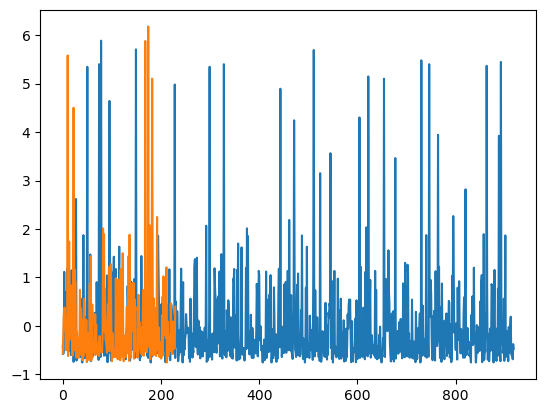

In [6]:
from tslearn.utils import to_time_series_dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_n, X_n, test_size=0.2, random_state=42)
plt.plot(X_train)
plt.plot(X_test)


In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# Set the number of units 20 - 100
UNITS = 100
DROPOUT = 0.2

# Build the GRU model
model = Sequential()
model.add(LSTM(units=UNITS, activation='relu', return_sequences=False, input_shape=(X_normalized.shape[1], X_normalized.shape[2])))
model.add(Dropout(DROPOUT))
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mse')

In [8]:
EPOCHS = 100
BATCH_SIZE = 30

# Train the model
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/100
31/31 [==============================] - 2s 13ms/step - loss: 0.9234 - val_loss: 0.9042
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 0.7802 - val_loss: 0.7541
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6365 - val_loss: 0.5652
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4387 - val_loss: 0.3550
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2323 - val_loss: 0.1592
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0950 - val_loss: 0.0399
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0310 - val_loss: 0.0058
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 0.0036
Epoch 9/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.0030
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0147 - val_loss: 0.0029
Epoch 11

In [9]:
# Make predictions on the entire dataset
print(X_n)


[[-0.7141232 ]
 [-0.75404669]
 [-0.73408494]
 ...
 [-0.60100664]
 [-0.68085362]
 [-0.57439098]]


In [10]:
# y_pred = model.predict(X_n.reshape(X_n.shape[0], X_n.shape[1], 1))
y_pred = model.predict(X_n)
# Print the predictions

print(y_pred)

36/36 [==============================] - 0s 929us/step
[[-0.68264884]
 [-0.70412135]
 [-0.69340795]
 ...
 [-0.6011285 ]
 [-0.6641745 ]
 [-0.57552326]]


In [11]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE) as a performance metric
mse = mean_squared_error(X_n, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0010017516106525506


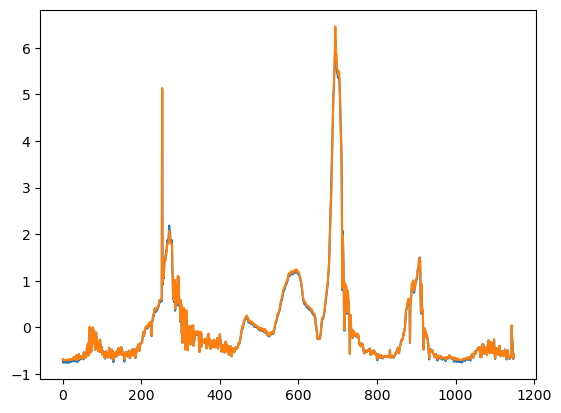

In [12]:
plt.plot(X_n)
plt.plot(y_pred)

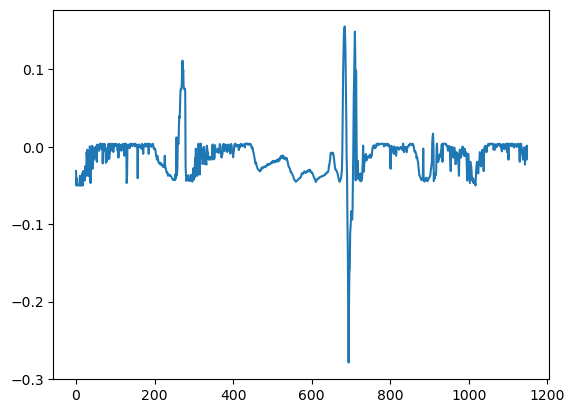

In [13]:
plt.plot(X_n-y_pred)

In [14]:
# Calculate mean and variance for inverse scaling

mu = np.mean(X)
var = np.var(X)
print(mu,var)

113.32375979112271 22586.319896742993


In [15]:
# Inverse transform predictions to get them in their original scale
y_pred_original_scale = (y_pred * np.sqrt(var)) + mu

In [16]:
import pandas as pd
df_lstm = pd.DataFrame()

df_lstm['X'] = X

df_lstm['y_pred_original_scale'] = y_pred_original_scale

df_lstm['Err'] = df_lstm['y_pred_original_scale'] - df_lstm['X']

df_lstm['Err_Sqr'] = df_lstm['Err']**2

MSE = df_lstm['Err_Sqr'].sum() / len(df_lstm)

print(df_lstm)
print(MSE)



         X  y_pred_original_scale       Err    Err_Sqr
0      6.0              10.730202  4.730202  22.374808
1      0.0               7.503151  7.503151  56.297274
2      3.0               9.113243  6.113243  37.371741
3      0.0               7.503151  7.503151  56.297274
4      0.0               7.503151  7.503151  56.297274
...    ...                    ...       ...        ...
1144  76.0              77.209641  1.209641   1.463230
1145  68.0              68.702026  0.702026   0.492841
1146  23.0              22.981682 -0.018318   0.000336
1147  11.0              13.506660  2.506660   6.283347
1148  27.0              26.829834 -0.170166   0.028956

[1149 rows x 4 columns]
22.62588452102775


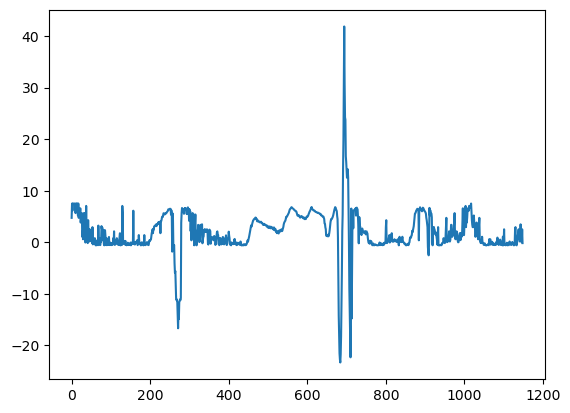

In [17]:
plt.plot(df_lstm['Err'])

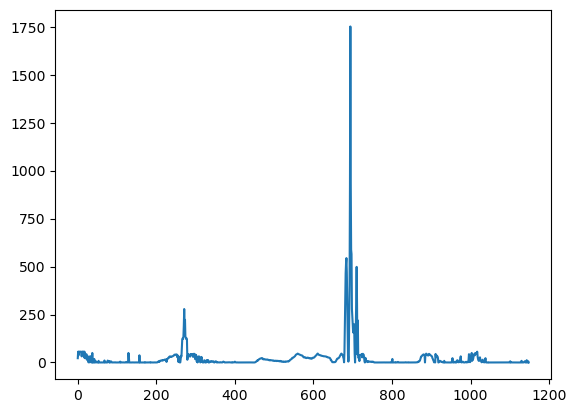

In [18]:
plt.plot(df_lstm['Err_Sqr'])

(array([  9.,  17.,   8., 682., 419.,   7.,   2.,   2.,   2.,   1.]),
 array([-23.32672119, -16.80878296, -10.29084473,  -3.77290649,
          2.74503174,   9.26296997,  15.7809082 ,  22.29884644,
         28.81678467,  35.3347229 ,  41.85266113]),
 <BarContainer object of 10 artists>)

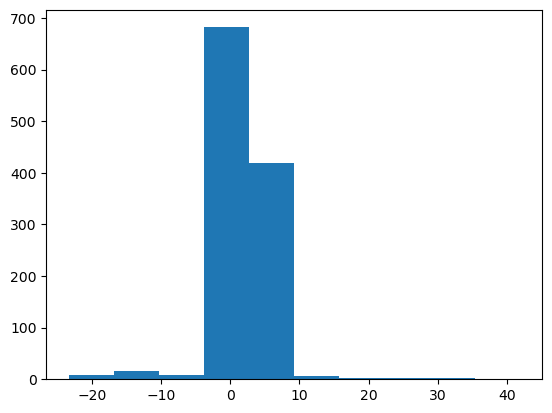

In [19]:
plt.hist(df_lstm['Err'])

In [20]:
from keras.models import save_model

# Save the model to a file
model.save("my_lstm_model_dropout.h5")
